### 1. First, load the dataset from the weatherinszeged table from Thinkful's database.

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import statsmodels.formula.api as smf
from sqlalchemy import create_engine

# Display preferences.
%matplotlib inline
pd.options.display.float_format = "{:.3f}".format

%load_ext nb_black

import warnings

warnings.filterwarnings(action="ignore")

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [2]:
postgres_user = "dsbc_student"
postgres_pw = "7*.8G9QH21"
postgres_host = "142.93.121.174"
postgres_port = "5432"
postgres_db = "weatherinszeged"

engine = create_engine(
    "postgresql://{}:{}@{}:{}/{}".format(
        postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db
    )
)
szeged_df = pd.read_sql_query("select * from weatherinszeged", con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()


szeged_df.head(50)

,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 03:00:00+00:00,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 04:00:00+00:00,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 05:00:00+00:00,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 06:00:00+00:00,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 07:00:00+00:00,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


<IPython.core.display.Javascript object>

### 2. Build a regression model where the target variable is temperature. As explanatory variables, use humidity, windspeed, windbearing, and pressure. Estimate the model using OLS.

In [4]:
# Let's pare down the dataframe to only our variables of interest

szeged_df = szeged_df.drop(
    columns=[
        "date",
        "summary",
        "preciptype",
        "apparenttemperature",
        "visibility",
        "loudcover",
        "dailysummary",
    ]
)

<IPython.core.display.Javascript object>

In [8]:
# check for missingness and odd values
display(szeged_df.isna().mean())
display(szeged_df.describe())

temperature   0.000
humidity      0.000
windspeed     0.000
windbearing   0.000
pressure      0.000
dtype: float64

,temperature,humidity,windspeed,windbearing,pressure
count,96453.000,96453.000,96453.000,96453.000,96453.000
mean,11.933,0.735,10.811,187.509,1003.236
std,9.552,0.195,6.914,107.383,116.970
min,-21.822,0.000,0.000,0.000,0.000
25%,4.689,0.600,5.828,116.000,1011.900
50%,12.000,0.780,9.966,180.000,1016.450
75%,18.839,0.890,14.136,290.000,1021.090
max,39.906,1.000,63.853,359.000,1046.380


<IPython.core.display.Javascript object>

Pressure of zero makes no sense, because that would be a complete vacuum.  We need to remove these values...

In [31]:
szeged_df.loc[szeged_df["pressure"] == 0, "pressure"] = np.nan

szeged_df = szeged_df.dropna()

szeged_df.describe()

,temperature,humidity,windspeed,windbearing,pressure
count,95165.000,95165.000,95165.000,95165.000,95165.000
mean,11.949,0.735,10.784,187.428,1016.814
std,9.546,0.196,6.892,107.406,7.778
min,-21.822,0.000,0.000,0.000,973.780
25%,4.733,0.600,5.812,116.000,1012.120
50%,12.039,0.780,9.918,180.000,1016.550
75%,18.839,0.890,14.120,290.000,1021.160
max,39.906,1.000,63.853,359.000,1046.380


<IPython.core.display.Javascript object>

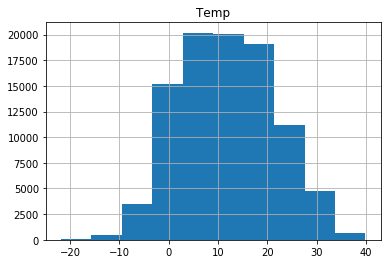

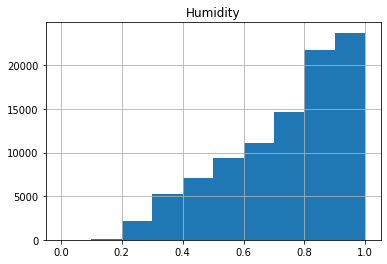

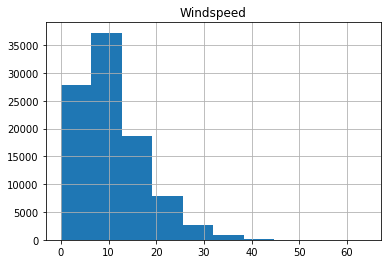

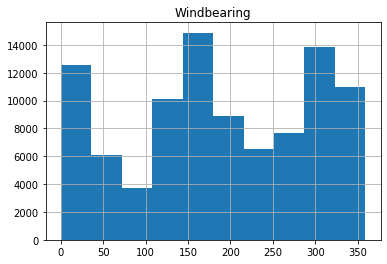

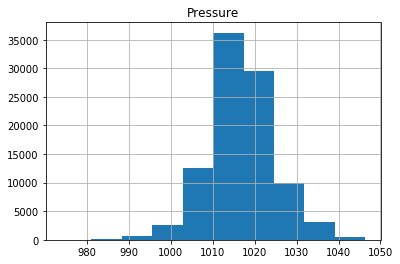

<IPython.core.display.Javascript object>

In [32]:
# Let's check the distribution of the variables for purposes
# of being able to evaluate our assumptions later

szeged_df["temperature"].hist()
plt.title("Temp")
plt.show()

szeged_df["humidity"].hist()
plt.title("Humidity")
plt.show()

szeged_df["windspeed"].hist()
plt.title("Windspeed")
plt.show()

szeged_df["windbearing"].hist()
plt.title("Windbearing")
plt.show()

szeged_df["pressure"].hist()
plt.title("Pressure")
plt.show()

In [36]:
y = szeged_df.temperature

X = szeged_df.drop(columns=["temperature"])

lrm = LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X, y)

print("\nCoefficients: \n", lrm.coef_)
print("\nIntercept: \n", lrm.intercept_, "\n")


Coefficients: 
 [-3.27467869e+01 -3.17826353e-01  2.52552064e-03 -4.17393403e-01]

Intercept: 
 463.3827082769674 



<IPython.core.display.Javascript object>

### 3. Now, check if your model meets the Gauss-Markov Conditions above. If some of the assumptions are not met, discuss the implications of the violations for the correctness of your model.

**Assumption 1: Linearity of the Model in it's coefficents:**

This assumption is met by virtue of having used the LinearRegression model to fit our data.

In [37]:
predictions = lrm.predict(X)
errors = y - predictions

print("Mean of the errors in the temperature model is: {}".format(np.mean(errors)))

Mean of the errors in the temperature model is: 9.375681022806904e-14


<IPython.core.display.Javascript object>

**Assumption 2: The error terms should be zero on average**

Assumption two is met because the mean of the errors is effectively zero.

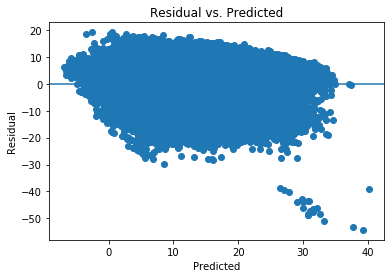

<IPython.core.display.Javascript object>

In [38]:
plt.scatter(predictions, errors)
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.axhline(y=0)
plt.title("Residual vs. Predicted")
plt.show()

In [39]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print(
    "Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(
        bart_stats[0], bart_stats[1]
    )
)
print(
    "Levene test statistic value is {0:3g} and p value is {1:.3g}".format(
        lev_stats[0], lev_stats[1]
    )
)

Bartlett test statistic value is 313.458 and p value is 3.85e-70
Levene test statistic value is 235.663 and p value is 3.74e-53


<IPython.core.display.Javascript object>

**Assumption 3: Homoscedasticity**

Assumption 3 is not met because the p-values for the Bartlett and Levene tests are both much less than 0.05.  We therefore reject the null hypthosesis that the errors are homoscedastic.  

In [42]:
X.corr(method="kendall")

,humidity,windspeed,windbearing,pressure
humidity,1.000,-0.177,-0.001,0.029
windspeed,-0.177,1.000,0.057,-0.154
windbearing,-0.001,0.057,1.000,-0.048
pressure,0.029,-0.154,-0.048,1.000


<IPython.core.display.Javascript object>

**Assumption 4: Low multicollinearity**

Assumption 4 is met because none of the variables are very highly correlated.

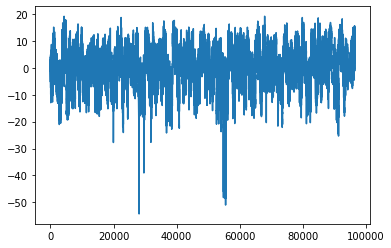

<IPython.core.display.Javascript object>

In [43]:
plt.plot(errors)
plt.show()

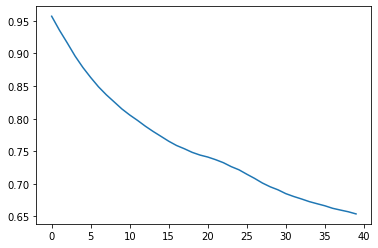

<IPython.core.display.Javascript object>

In [44]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

**Assumption 5: error terms should be uncorrelated with one another**

Assumption 5 is not met because there is a clear trend in the acf.

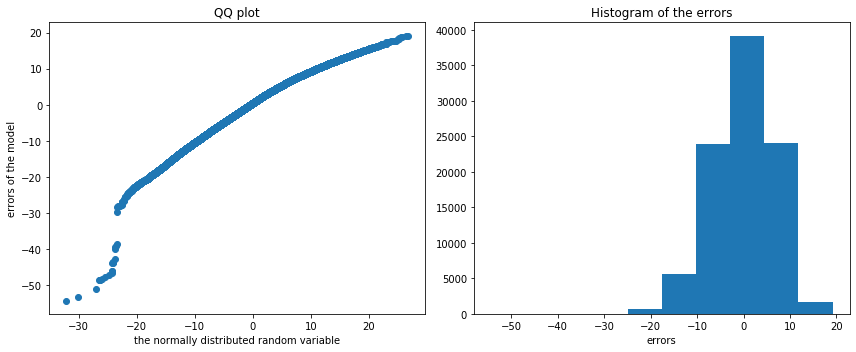

<IPython.core.display.Javascript object>

In [45]:
rand_nums = np.random.normal(np.mean(errors), np.std(errors), len(errors))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(np.sort(rand_nums), np.sort(errors))  # we sort the arrays
plt.xlabel("the normally distributed random variable")
plt.ylabel("errors of the model")
plt.title("QQ plot")

plt.subplot(1, 2, 2)
plt.hist(errors)
plt.xlabel("errors")
plt.title("Histogram of the errors")

plt.tight_layout()
plt.show()

In [48]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print(
    "Jarque-Bera test statistics is {0} and p value is {1:.2f}".format(
        jb_stats[0], jb_stats[1]
    )
)
print(
    "Normality test statistics is {0} and p value is {1:.2f}".format(
        norm_stats[0], norm_stats[1]
    )
)

Jarque-Bera test statistics is 3960.090238932337 and p value is 0.00
Normality test statistics is 3441.751245474652 and p value is 0.00


<IPython.core.display.Javascript object>

**Bonus check: Normality of errors.**

The errors are not normally distributed.  